# Median House Sale Prices forecast in New Haven

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [24]:
#importing libraries

In [25]:
import pandas as pd
from prophet import Prophet

In [26]:
#ignoring the warnings occured during fitting the model

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the data frame

In [29]:
data_frame=pd.read_csv('New Haven.csv')

In [30]:
county_name=data_frame['County'].value_counts().index[0]

In [31]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,182512.15,235175.24,New Haven
1,2001-02-01,182512.15,207160.58,New Haven
2,2001-03-01,185554.02,221848.14,New Haven
3,2001-04-01,184793.56,217779.41,New Haven
4,2001-05-01,197721.50,239188.69,New Haven


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [32]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,182512.15,235175.24
1,2001-02-01,182512.15,207160.58
2,2001-03-01,185554.02,221848.14
3,2001-04-01,184793.56,217779.41
4,2001-05-01,197721.50,239188.69


Extracting only Median Sale Price as a dataframe by removing Average Sale Price feature

In [34]:
median_data=data_frame.drop(['Average Sale Price'],axis=1)

## Forecasting median_data

In [35]:
median_data.head()

,Date,Median Sale Price
0,2001-01-01,182512.15
1,2001-02-01,182512.15
2,2001-03-01,185554.02
3,2001-04-01,184793.56
4,2001-05-01,197721.50


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [36]:
median_data.columns=['ds','y']

In [37]:
median_data

,ds,y
0,2001-01-01,182512.15
1,2001-02-01,182512.15
2,2001-03-01,185554.02
3,2001-04-01,184793.56
4,2001-05-01,197721.50
...,...,...
245,2021-06-01,275000.00
246,2021-07-01,272000.00
247,2021-08-01,267000.00
248,2021-09-01,263000.00


In [38]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(median_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [40]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,293951.989935,279596.356820,308000.561309
270,2023-06-30,289998.616404,275609.151997,304710.243109
271,2023-07-31,296593.310407,283124.787290,311827.842701
272,2023-08-31,281275.362162,266532.768650,296357.829028
273,2023-09-30,270175.618884,254494.762580,284622.780241


Calling the forecast dataframe which contains the predicted values along with the actual values

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,185885.837775,154793.977068,178771.300615,185885.837775,185885.837775,-19691.856273,-19691.856273,-19691.856273,-19691.856273,-19691.856273,-19691.856273,0.0,0.0,0.0,166193.981502
1,2001-02-01,187810.253863,152665.692229,176936.345416,187810.253863,187810.253863,-22742.493853,-22742.493853,-22742.493853,-22742.493853,-22742.493853,-22742.493853,0.0,0.0,0.0,165067.760010
2,2001-03-01,189548.436135,160516.954932,184833.461344,189548.436135,189548.436135,-16466.837609,-16466.837609,-16466.837609,-16466.837609,-16466.837609,-16466.837609,0.0,0.0,0.0,173081.598527
3,2001-04-01,191472.852223,173257.977310,197418.328555,191472.852223,191472.852223,-6211.569950,-6211.569950,-6211.569950,-6211.569950,-6211.569950,-6211.569950,0.0,0.0,0.0,185261.282273
4,2001-05-01,193335.190372,183344.958160,208208.742673,193335.190372,193335.190372,2831.457552,2831.457552,2831.457552,2831.457552,2831.457552,2831.457552,0.0,0.0,0.0,196166.647925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,271197.451114,279596.356820,308000.561309,265086.986858,277707.128971,22754.538821,22754.538821,22754.538821,22754.538821,22754.538821,22754.538821,0.0,0.0,0.0,293951.989935
270,2023-06-30,272198.246669,275609.151997,304710.243109,265610.031330,279322.730787,17800.369735,17800.369735,17800.369735,17800.369735,17800.369735,17800.369735,0.0,0.0,0.0,289998.616404
271,2023-07-31,273232.402075,283124.787290,311827.842701,266088.556416,280906.857231,23360.908332,23360.908332,23360.908332,23360.908332,23360.908332,23360.908332,0.0,0.0,0.0,296593.310407
272,2023-08-31,274266.557482,266532.768650,296357.829028,266495.024354,282427.510018,7008.804680,7008.804680,7008.804680,7008.804680,7008.804680,7008.804680,0.0,0.0,0.0,281275.362162


## Plotting the forecast data

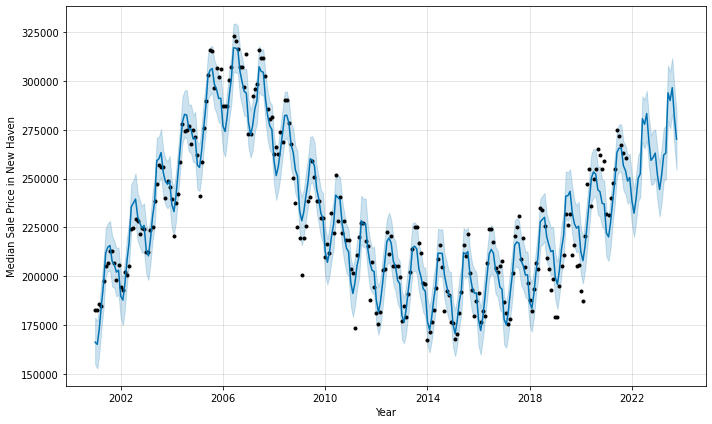

In [42]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

## Plotting components of forecast data

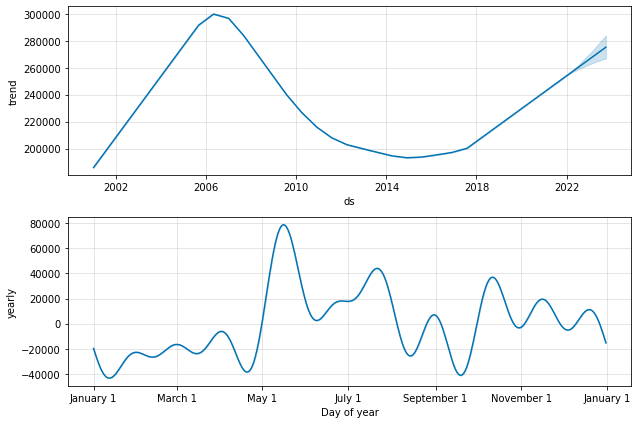

In [43]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [45]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics

In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,2.000411e+08,14143.588908,10976.601649,0.047192,0.041677,0.047873,0.409091
1,40 days,2.081815e+08,14428.495507,11233.213015,0.047995,0.041677,0.048796,0.409091
2,42 days,1.956200e+08,13986.420928,10837.419172,0.046514,0.037181,0.047213,0.431818
3,44 days,1.878542e+08,13705.992118,10392.319593,0.044324,0.034088,0.044927,0.454545
4,45 days,1.858124e+08,13631.301814,10337.437019,0.044186,0.033234,0.044701,0.454545


In [48]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.95280825162011%
Horizon: 40 days 00:00:00, Accuracy: 99.95200477936089%
Horizon: 42 days 00:00:00, Accuracy: 99.95348643013882%
Horizon: 44 days 00:00:00, Accuracy: 99.95567589185696%
Horizon: 45 days 00:00:00, Accuracy: 99.95581449592865%
Horizon: 46 days 00:00:00, Accuracy: 99.9566165060441%
Horizon: 47 days 00:00:00, Accuracy: 99.95655322669788%
Horizon: 49 days 00:00:00, Accuracy: 99.9554913901068%
Horizon: 50 days 00:00:00, Accuracy: 99.95649970749031%
Horizon: 51 days 00:00:00, Accuracy: 99.954949029587%
Horizon: 52 days 00:00:00, Accuracy: 99.95539696875478%
Horizon: 54 days 00:00:00, Accuracy: 99.9560636312662%
Horizon: 55 days 00:00:00, Accuracy: 99.95742543845188%
Horizon: 56 days 00:00:00, Accuracy: 99.95879558786767%
Horizon: 58 days 00:00:00, Accuracy: 99.95899722481971%
Horizon: 60 days 00:00:00, Accuracy: 99.95666727109065%
Horizon: 61 days 00:00:00, Accuracy: 99.9548748224464%
Horizon: 62 days 00:00:00, Accuracy: 99.95468900473888

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

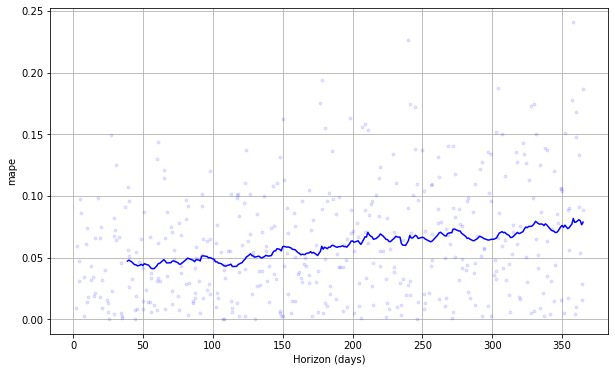

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 80-90.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [50]:
import pickle

In [51]:
with open(county_name+'_prophet_model_for_median_sale_price.pkl','wb') as file:
    pickle.dump(m,file)